# **CREDIT CARD FRAUD DETECTION PROJECT EDA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df=pd.read_csv("fraudTrain.csv")
train_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0


In [ ]:
train_df.shape

(1273687, 23)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273687 entries, 0 to 1273686
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1273687 non-null  int64  
 1   trans_date_trans_time  1273686 non-null  object 
 2   cc_num                 1273686 non-null  float64
 3   merchant               1273686 non-null  object 
 4   category               1273686 non-null  object 
 5   amt                    1273686 non-null  float64
 6   first                  1273686 non-null  object 
 7   last                   1273686 non-null  object 
 8   gender                 1273686 non-null  object 
 9   street                 1273686 non-null  object 
 10  city                   1273686 non-null  object 
 11  state                  1273686 non-null  object 
 12  zip                    1273686 non-null  float64
 13  lat                    1273686 non-null  float64
 14  long              

# **Column Names and Meanings:**

In [ ]:
# @title
print("\nColumn Names and Meanings:")
print("1. trans_date_trans_time - Transaction date and time")
print("2. cc_num - Credit card number (sensitive, will be dropped)")
print("3. merchant - Merchant/store name")
print("4. category - Transaction category (e.g., grocery, shopping)")
print("5. amt - Transaction amount")
print("6. first - Customer first name (sensitive, will be dropped)")
print("7. last - Customer last name (sensitive, will be dropped)")
print("8. gender - Customer gender (M/F)")
print("9. street - Customer street address (sensitive, will be dropped)")
print("10. city - Customer city")
print("11. state - Customer state")
print("12. zip - Customer zip code")
print("13. lat - Customer latitude location")
print("14. long - Customer longitude location")
print("15. city_pop - Population of customer's city")
print("16. job - Customer's occupation")
print("17. dob - Customer date of birth")
print("18. trans_num - Transaction ID number")
print("19. unix_time - Transaction time in Unix format")
print("20. merch_lat - Merchant latitude location")
print("21. merch_long - Merchant longitude location")
print("22. is_fraud - Target variable (1 = fraud, 0 = not fraud)")
print("23. Unnamed: 0 - Index column (will be dropped)")


Column Names and Meanings:
1. trans_date_trans_time - Transaction date and time
2. cc_num - Credit card number (sensitive, will be dropped)
3. merchant - Merchant/store name
4. category - Transaction category (e.g., grocery, shopping)
5. amt - Transaction amount
6. first - Customer first name (sensitive, will be dropped)
7. last - Customer last name (sensitive, will be dropped)
8. gender - Customer gender (M/F)
9. street - Customer street address (sensitive, will be dropped)
10. city - Customer city
11. state - Customer state
12. zip - Customer zip code
13. lat - Customer latitude location
14. long - Customer longitude location
15. city_pop - Population of customer's city
16. job - Customer's occupation
17. dob - Customer date of birth
18. trans_num - Transaction ID number
19. unix_time - Transaction time in Unix format
20. merch_lat - Merchant latitude location
21. merch_long - Merchant longitude location
22. is_fraud - Target variable (1 = fraud, 0 = not fraud)
23. Unnamed: 0 - Inde

In [ ]:
train_df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,1
cc_num,1
merchant,1
category,1
amt,1
first,1
last,1
gender,1
street,1


In [ ]:
train_df.duplicated().sum()

np.int64(3876)

In [ ]:
# Check fraud distribution
train_df['is_fraud'].value_counts()

,count
is_fraud,
0.0,1266360
1.0,7325


In [ ]:
# Percentage of fraud cases:
train_df['is_fraud'].value_counts(normalize=True) * 100

,proportion
is_fraud,
0.0,99.424897
1.0,0.575103


# **Data Cleaning**

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num']

In [ ]:
train_df_clean = train_df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
# Convert transaction date to datetime and extract useful features
train_df_clean['trans_date_trans_time'] = pd.to_datetime(train_df_clean['trans_date_trans_time'])
train_df_clean['transaction_hour'] = train_df_clean['trans_date_trans_time'].dt.hour
train_df_clean['transaction_day'] = train_df_clean['trans_date_trans_time'].dt.day
train_df_clean['transaction_month'] = train_df_clean['trans_date_trans_time'].dt.month
train_df_clean = train_df_clean.drop('trans_date_trans_time', axis=1)

In [ ]:
train_df_clean.head(3)

,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,transaction_month
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,1.325376e+09,36.011293,-82.048315,0.0,0.0,1.0,1.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,1.325376e+09,49.159047,-118.186462,0.0,0.0,1.0,1.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.262,4154,1.325376e+09,43.150704,-112.154481,0.0,0.0,1.0,1.0


In [ ]:
# Handle categorical variables
categorical_cols = train_df_clean.select_dtypes(include=['object']).columns
categorical_cols

Index(['merchant', 'category', 'gender', 'long', 'city_pop'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
    train_df_clean[col] = le.fit_transform(train_df_clean[col].astype(str))

# **EDA & Visualization**

In [ ]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

#### **This visualization shows the distribution of Fraud and Non-Fraud transactions using a countplot. The bars are color-coded for clarity (green for Non-Fraud and red for Fraud), and the exact counts are displayed on top of each bar. This helps in quickly identifying the imbalance between fraudulent and genuine transactions**

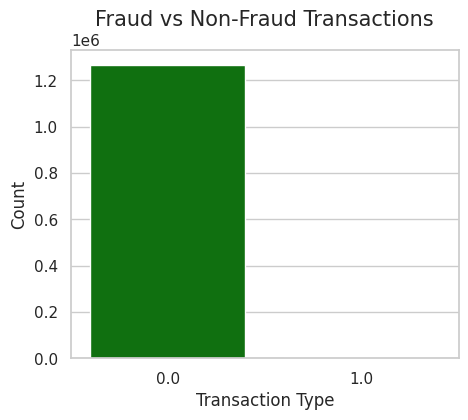

In [ ]:
# 1. Fraud vs Non-Fraud countplot
plt.figure(figsize=(5, 4))
sns.countplot(x='is_fraud', data=train_df_clean, palette=['green', 'red'])
plt.title('Fraud vs Non-Fraud Transactions', fontsize=15)
plt.xlabel('Transaction Type')
plt.ylabel('Count')

plt.show()

#### **This boxplot compares the distribution of transaction amounts for Fraud and Non-Fraud cases (outliers above 1000 are removed for better visualization). It highlights the difference in amount patterns between fraudulent and genuine transactions.**
---



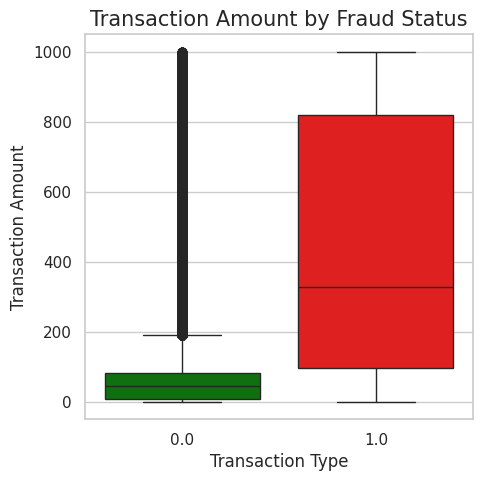

In [ ]:
# # 2. Transaction amount distribution by fraud status

plt.figure(figsize=(5,5))
sns.boxplot(x='is_fraud', y='amt',
            data=train_df_clean[train_df_clean['amt'] < 1000],
            palette=['green', 'red'])
plt.title('Transaction Amount by Fraud Status', fontsize=15)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

#### **This heatmap visualizes the correlation between numerical features in the dataset. It highlights positive (blue) and negative (red) relationships, helping to identify which variables are strongly related to each other or to fraud detection.**

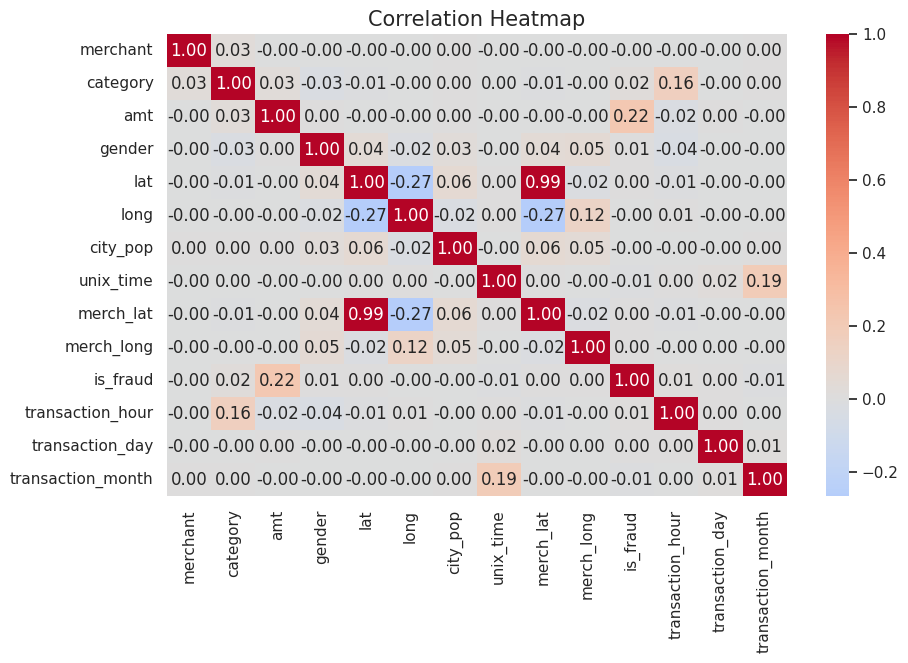

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = train_df_clean.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

#### **This bar chart shows the number of transactions occurring at each hour of the day. It helps identify peak transaction hours and patterns in customer activity, which can be useful for detecting unusual or fraudulent behavior.**

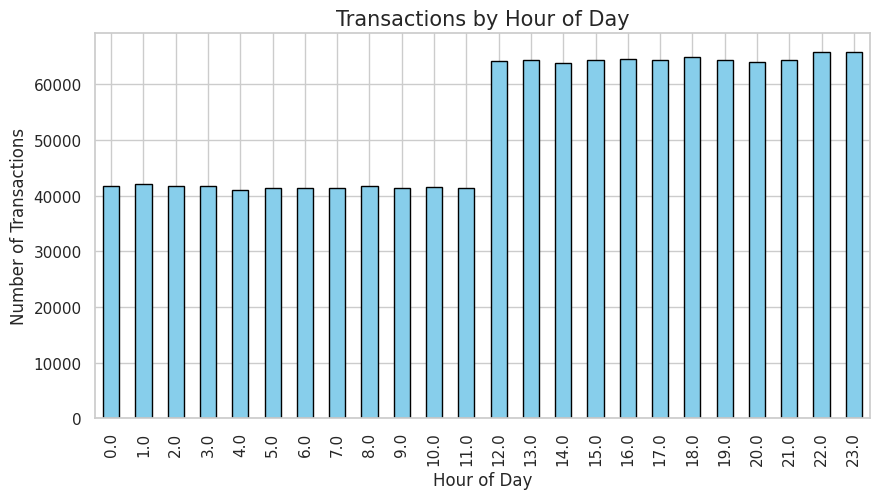

In [ ]:
# 4. Hourly transaction patterns
plt.figure(figsize=(10, 5))
hourly_transactions = train_df_clean.groupby('transaction_hour').size()
hourly_transactions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transactions by Hour of Day', fontsize=15)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

#### **This bar chart illustrates the fraud rate (%) across different hours of the day. It highlights the time periods with higher likelihood of fraudulent activity, which can support fraud detection strategies and monitoring.**

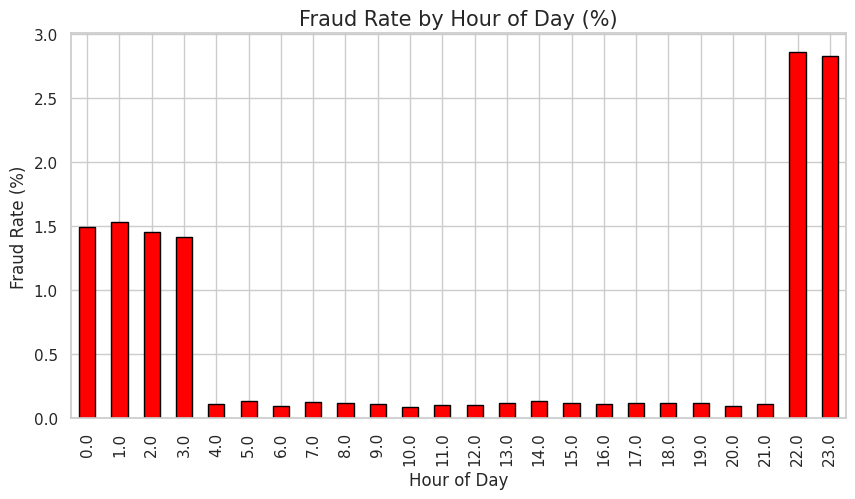

In [ ]:
# # Fraud rate by hour
plt.figure(figsize=(10, 5))
# Fraud rate per hour (%)
hourly_fraud = train_df_clean.groupby('transaction_hour')['is_fraud'].mean() * 100
hourly_fraud.plot(kind='bar', color='red', edgecolor='black')
plt.title('Fraud Rate by Hour of Day (%)', fontsize=15)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.show()

#### **This histogram shows the distribution of transaction amounts for Fraud and Non-Fraud cases. Most transactions are of lower amounts, while higher amounts are less frequent. The comparison helps identify differences in spending patterns between fraudulent and genuine transactions.**

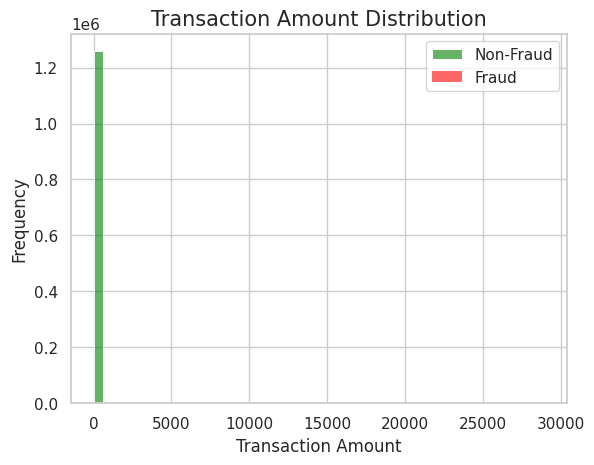

In [ ]:
# Histogram for Non-Fraud and Fraud
sns.histplot(train_df_clean[train_df_clean['is_fraud'] == 0]['amt'],
             bins=50, color='green', label='Non-Fraud', alpha=0.6)

sns.histplot(train_df_clean[train_df_clean['is_fraud'] == 1]['amt'],
             bins=50, color='red', label='Fraud', alpha=0.6)

# Title, labels and legend
plt.title('Transaction Amount Distribution', fontsize=15)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### **This histogram (with log scale) provides a clearer view of transaction amount distribution by reducing the effect of extreme outliers. It highlights how most fraudulent and non-fraudulent transactions cluster within lower log-transformed ranges, making the comparison more interpretable.**

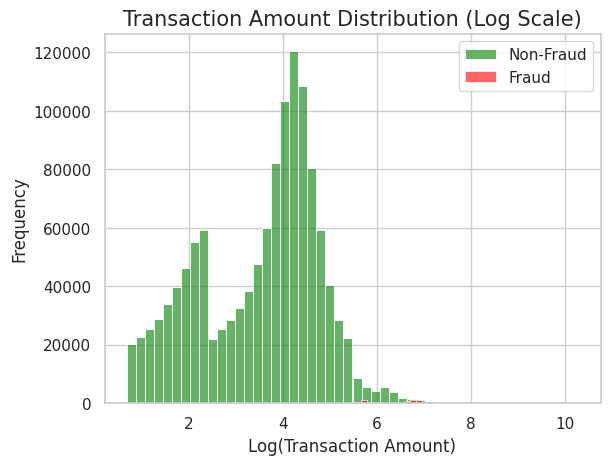

In [ ]:
# Histogram with log scale
sns.histplot(np.log1p(train_df_clean[train_df_clean['is_fraud'] == 0]['amt']),
             bins=50, color='green', label='Non-Fraud', alpha=0.6)

sns.histplot(np.log1p(train_df_clean[train_df_clean['is_fraud'] == 1]['amt']),
             bins=50, color='red', label='Fraud', alpha=0.6)

# Title, labels and legend
plt.title('Transaction Amount Distribution (Log Scale)', fontsize=15)
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### **This bar chart shows the fraud percentage across different transaction categories. It highlights which categories are more prone to fraud, providing valuable insights for risk assessment and fraud prevention strategies.**

In [ ]:
# Fraud Percentage by Category
# Calculate fraud percentage by category
category_fraud = train_df_clean.groupby('category')['is_fraud'].agg(['count', 'sum'])
category_fraud['fraud_percentage'] = (category_fraud['sum'] / category_fraud['count']) * 100
category_fraud = category_fraud.sort_values('fraud_percentage', ascending=False)

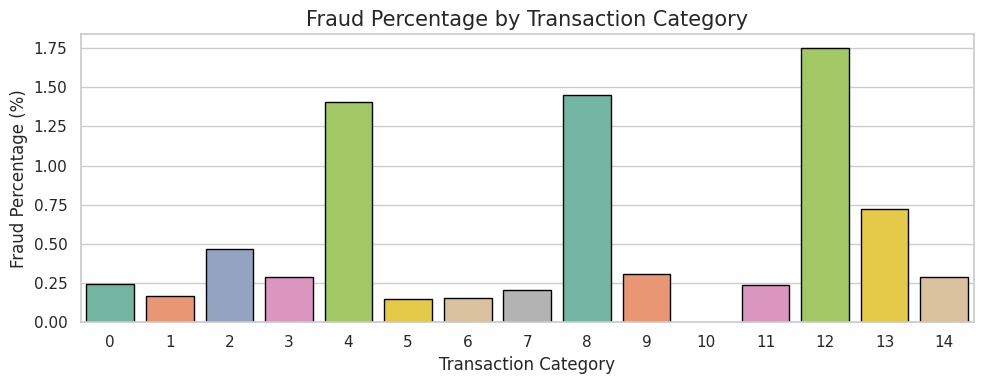

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=category_fraud.index,
            y=category_fraud['fraud_percentage'],
            palette='Set2', edgecolor='black')
plt.title('Fraud Percentage by Transaction Category', fontsize=15)
plt.xlabel('Transaction Category')
plt.ylabel('Fraud Percentage (%)')
plt.tight_layout()
plt.show()

#### **This bar chart shows the fraud percentage by gender. It highlights if there is any significant difference in fraud vulnerability between male and female customers.**

In [ ]:
# Fraud Percentage by Gender
gender_fraud = train_df_clean.groupby('gender')['is_fraud'].agg(['count', 'sum'])
gender_fraud['fraud_percentage'] = (gender_fraud['sum'] / gender_fraud['count']) * 100


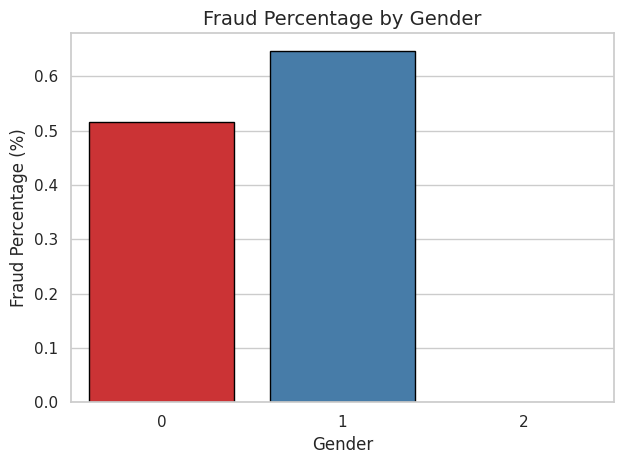

In [ ]:
sns.barplot(x=gender_fraud.index,
            y=gender_fraud['fraud_percentage'],
            palette='Set1', edgecolor='black')
plt.title('Fraud Percentage by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Fraud Percentage (%)')
plt.tight_layout()
plt.show()

#### **This boxplot compares city population distribution for Fraud and Non-Fraud transactions (log scale). It shows whether fraudulent activities are more likely in smaller or larger cities.**

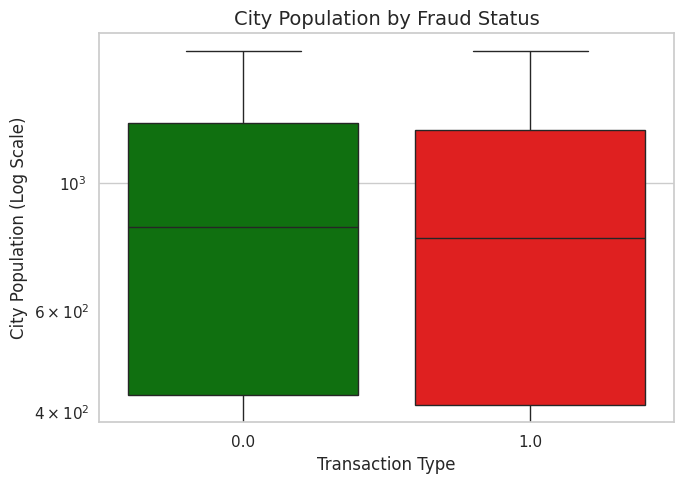

In [ ]:
# City Population vs Fraud
# Boxplot of city population by fraud status
plt.figure(figsize=(7, 5))
sns.boxplot(x='is_fraud', y='city_pop',
            data=train_df_clean,
            palette=['green', 'red'])
plt.title('City Population by Fraud Status', fontsize=14)
plt.xlabel('Transaction Type')
plt.ylabel('City Population (Log Scale)')
plt.yscale('log')
plt.tight_layout()
plt.show()

#### **This boxplot compares city population distribution for Fraud and Non-Fraud transactions (log scale). It shows whether fraudulent activities are more likely in smaller or larger cities.**

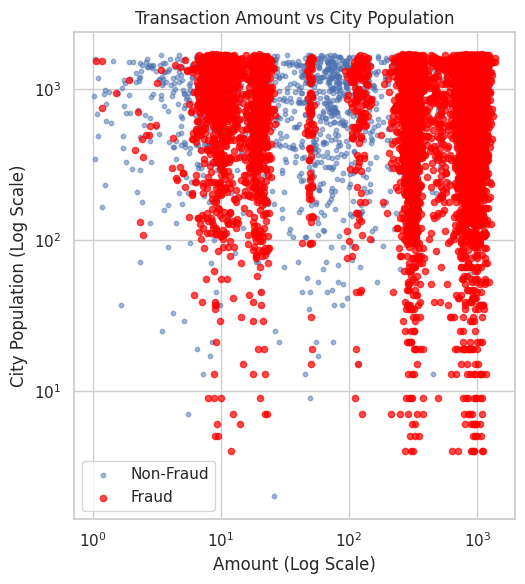

In [ ]:
# Scatter plot of amount vs city population
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
fraud_data = train_df_clean[train_df_clean['is_fraud'] == 1]
non_fraud_data = train_df_clean[train_df_clean['is_fraud'] == 0].sample(n=1000)
plt.scatter(non_fraud_data['amt'], non_fraud_data['city_pop'],
            alpha=0.5, label='Non-Fraud', s=10)
plt.scatter(fraud_data['amt'], fraud_data['city_pop'],
            alpha=0.7, label='Fraud', color='red', s=20)
plt.xscale('log')
plt.yscale('log')
plt.title('Transaction Amount vs City Population')
plt.xlabel('Amount (Log Scale)')
plt.ylabel('City Population (Log Scale)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Top merchants by fraud count (sampling for visualization)
merchant_fraud = train_df_clean.groupby('merchant')['is_fraud'].agg(['count', 'sum'])
merchant_fraud = merchant_fraud[merchant_fraud['sum'] > 0].sort_values('sum', ascending=False).head(10)

#### **This bar chart highlights the top 10 merchants with the highest number of fraudulent transactions. It helps identify high-risk merchants and potential fraud hotspots.**

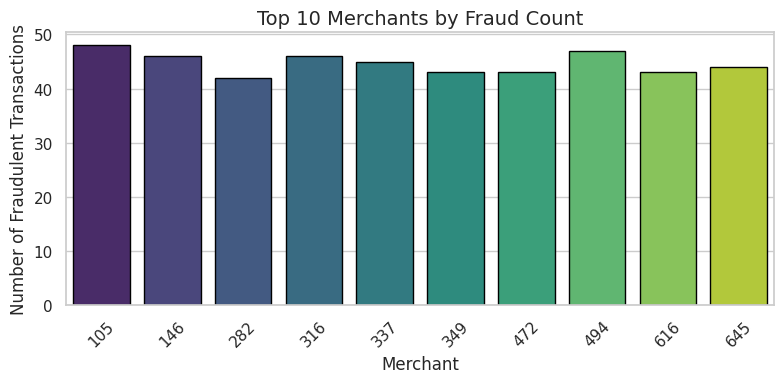

In [ ]:
plt.figure(figsize=(8, 4))

sns.barplot(x=merchant_fraud.index,
            y=merchant_fraud['sum'],
            palette='viridis', edgecolor='black')
plt.title('Top 10 Merchants by Fraud Count', fontsize=14)
plt.xlabel('Merchant')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  **Time-Based Analysis**

#### **This bar chart shows the fraud rate (%) across different hours of the day. It reveals time-based fraud patterns, helping detect peak hours of fraudulent activity.**

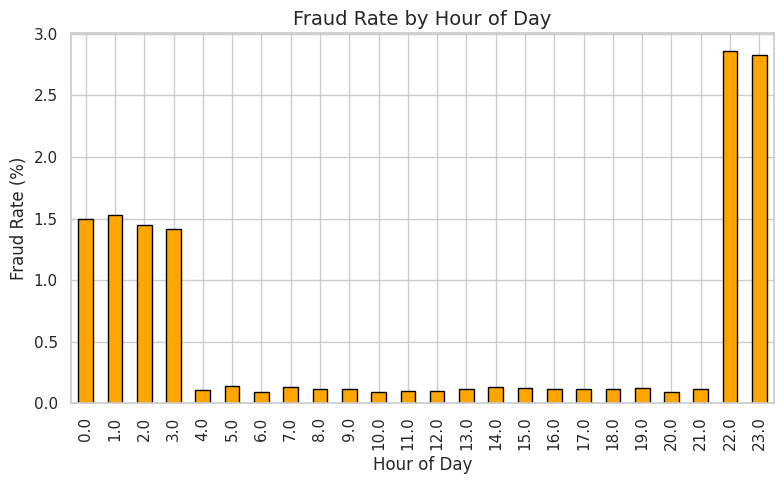

In [ ]:
# # Fraud by hour of day
plt.figure(figsize=(8, 5))

# Fraud rate by hour
hourly_fraud = train_df_clean.groupby('transaction_hour')['is_fraud'].mean() * 100
hourly_fraud.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Fraud Rate by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()

#### **This bar chart shows the fraud rate (%) for each day of the month. It helps in identifying unusual days with higher fraudulent activity compared to normal transaction patterns.**

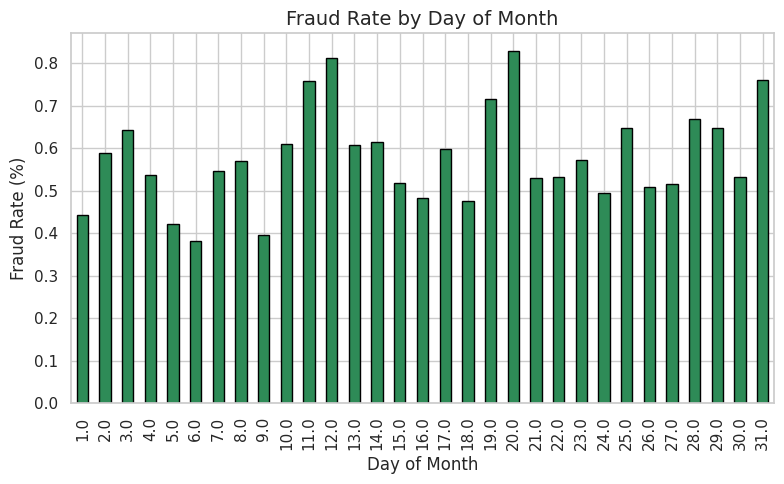

In [ ]:
# Fraud by day of month
plt.figure(figsize=(8, 5))

# Fraud rate by day of month
daily_fraud = train_df_clean.groupby('transaction_day')['is_fraud'].mean() * 100
daily_fraud.plot(kind='bar', color='seagreen', edgecolor='black')
plt.title('Fraud Rate by Day of Month', fontsize=14)
plt.xlabel('Day of Month')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()

#### **This bar chart displays the fraud rate (%) across different months. It helps in identifying seasonal trends and periods with higher fraud risk.**

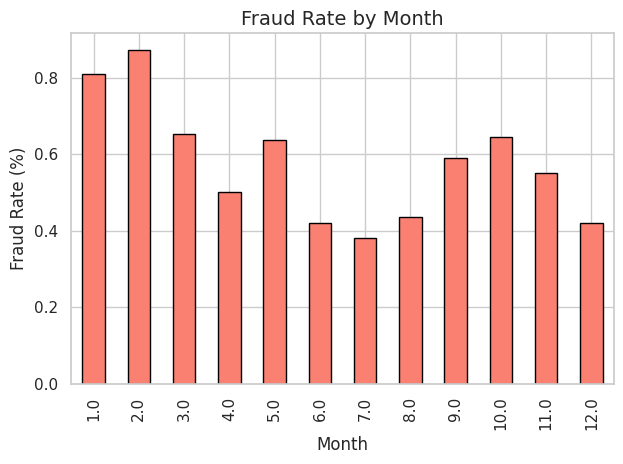

In [ ]:
# Fraud rate by month
monthly_fraud = train_df_clean.groupby('transaction_month')['is_fraud'].mean() * 100
monthly_fraud.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Fraud Rate by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()


#### **This bar chart shows the total number of transactions occurring in each hour of the day. It helps identify peak transaction hours and daily activity patterns, which can support fraud monitoring strategies.**

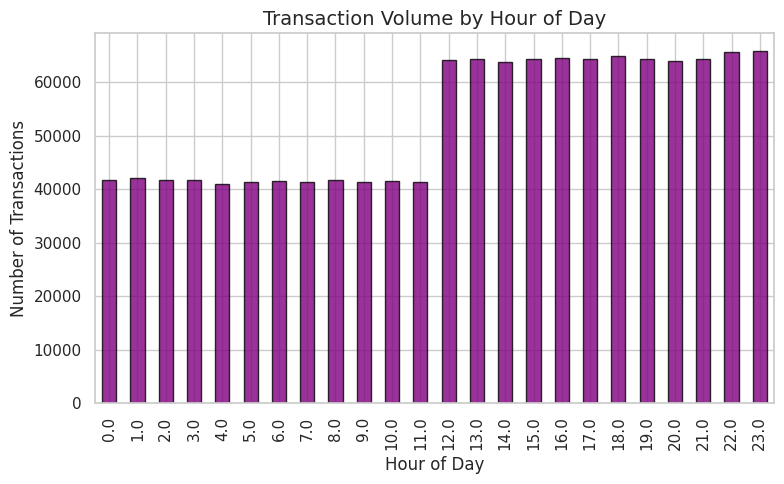

In [ ]:
# Transaction volume by hour
plt.figure(figsize=(8, 5))
hourly_volume = train_df_clean.groupby('transaction_hour').size()
hourly_volume.plot(kind='bar', color='purple', edgecolor='black', alpha=0.8)
plt.title('Transaction Volume by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()